# Kiwi Challenge 2018

## Deep Learning

## Project: Build a German Traffic Sign Classifier

In this Notebook, all the steps are explained for a better understanding of the program, some additional code that does not appear in this Notebook, it will be found in the Python code. Details of this challengue can be found [here](https://github.com/KiwiCampusChallenge/Kiwi-Campus-Challenge/blob/master/Deep-Learning-Challenge.md)

## Step 0: Download the data
The data will be automatically downloaded from the link http://benchmark.ini.rub.de/Dataset_GTSDB/FullIJCNN2013.zip

To use this function, use the command  **python app.py download**

In [2]:
import cv2
import time,random
import os,shutil
import urllib.request
import zipfile
import click
import matplotlib.pyplot as plt
import numpy as np
import pickle,sys
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from PIL import Image
from tensorflow.contrib.layers import flatten

In [12]:
ROWS=32
COLS=32
NUM_CLASSES=43

def print_download_progress(count, block_size, total_size):
    pct_complete = float(count * block_size) / total_size
    msg = "\r- File downloading: {0:.1%}".format(pct_complete)
    sys.stdout.write(msg)
    sys.stdout.flush()
	
def download():
    url = "http://benchmark.ini.rub.de/Dataset_GTSDB/FullIJCNN2013.zip"
    download_dir = "data/"
    filename = url.split('/')[-1]
    file_path = os.path.join(download_dir, filename)
    if not os.path.exists(file_path):
        if not os.path.exists(download_dir):
            os.makedirs(download_dir)
        print("Extracting from: ",url )
        file_path, _ = urllib.request.urlretrieve(url=url,filename=file_path,reporthook=print_download_progress)
        print("Download finished in folder data/")
        print("Done.")
    else:
        print("Data has apparently already been downloaded")
        print("Getting new, testing and training images  images/train, images/test")

    if file_path.endswith(".zip"):
        print("We will extract only classification files ")
        download_file = download_dir + "FullIJCNN2013.zip"
        with zipfile.ZipFile(download_file, 'r') as zip:
            filelist = zip.filelist
            for detail in filelist:
                name = detail.filename
                if name.count("/") == 2:
                    zip.extract(name, "data/")
                if name[-10:] == 'ReadMe.txt':
                    zip.extract(name, "data/")

    print("We split the data 80% training and 20% testing in /images/train and /images/test")

The data will be downloaded in the folder **data/**

In [7]:
download()

Data has apparently already been downloaded
Getting new, testing and training images  images/train, images/test
We will extract only classification files 
We split the data 80% training and 20% testing in /images/train and /images/test


If you have downloaded the .zip in the folder data/ , this function will extract only the classification files and **ReadMe.txt** (It thas information about the label classes)

## Step 1: Split data (Training Set, Test Set)
Now, we are going to split data 80% (Training Set) and 20% (Test Set).

Training set, will be saved in the folder  **images/train** and Test Set will be in the folder **images/test**. (It is not necessary to create any folder, the program will do it).

In [10]:
def read_images(path_folder="data/FullIJCNN2013/"):
    X=[]
    Y=[]
    for name in os.listdir(path_folder):
        if os.path.isdir(os.path.join(path_folder, name)):
            idclass=int(name)
            path_class=os.path.join(path_folder, name)
            for file in os.listdir(path_class):
                if os.path.isfile(os.path.join(path_class, file)):
                    img = Image.open(os.path.join(path_class, file))
                    img_array=np.array(img)
                    X.append(img_array)
                    Y.append(idclass)
    return np.array(X),np.array(Y)

def save_images(Xtrain,Xtest,Ytrain,Ytest):
    if not os.path.exists("images"):
        os.makedirs("images")

    if os.path.exists("images/test"):
        shutil.rmtree("images/test")
        time.sleep(5)
    os.makedirs("images/test")

    it=0
    for i in range(NUM_CLASSES):
        folder_class="images/test/"+str(i)+"/"

        if not os.path.exists(folder_class):
            os.makedirs(folder_class)

        count=(Ytest==i).sum()
        for j in range(count):
            file_name="00"
            if j<10:
                file_name = file_name + "00" + str(j) + ".png"
            else:
                file_name = file_name + "0" + str(j) + ".png"
            Image.fromarray(Xtest[it]).save(folder_class+file_name)
            it=it+1

    if os.path.exists("images/train"):
        shutil.rmtree("images/train")
        time.sleep(5)
    os.makedirs("images/train")

    it = 0
    for i in range(NUM_CLASSES):
        folder_class = "images/train/" + str(i) + "/"

        if not os.path.exists(folder_class):
            os.makedirs(folder_class)

        count = (Ytrain == i).sum()
        for j in range(count):
            file_name = "00"
            if j < 10:
                file_name = file_name + "00" + str(j) + ".png"
            else:
                file_name = file_name + "0" + str(j) + ".png"
            Image.fromarray(Xtrain[it]).save(folder_class + file_name)
            it = it + 1


def split(X,Y, thres=0.8):
    n=X.shape[0]
    order=np.argsort(Y)
    X2=X
    Y2=Y

    for i in range(n):
        X2[i]=X[order[i]]
        Y2[i]=Y[order[i]]

    X=X2
    Y=Y2
    Xtrain=[]
    Xtest=[]
    Ytrain=[]
    Ytest=[]

    start=0
    for i in range(NUM_CLASSES):
        count= (Y==i).sum()
        select= int(count*thres+0.6)
        if select==count:
            select=select-1
        choice= np.random.choice(count,select,replace=False)
        for j in range(count):
            if j in choice:
                Xtrain.append(X[j+start])
                Ytrain.append(Y[j+start])
            else:
                Xtest.append(X[j+start])
                Ytest.append(Y[j+start])
        start=start+count
    return np.array(Xtrain),np.array(Xtest),np.array(Ytrain),np.array(Ytest)

We use the following functions, to read the images downloaded and send it to the final folders.

In [13]:
    X,Y= read_images()
    Xtrain,Xtest,Ytrain,Ytest = split(X,Y)
    save_images(Xtrain,Xtest,Ytrain,Ytest)

## Exploring the data downloaded

In [14]:
print("Number of training images: ",Xtrain.shape[0])
print("Number of test images: ",Xtest.shape[0])

Number of training images:  976
Number of test images:  237


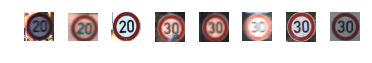

In [17]:
for i in range(8):
	plt.subplot(1, 8, i+1)
	plt.axis('off')
	plt.imshow(Xtrain[i])
	plt.subplots_adjust(wspace=0.5)
plt.show()

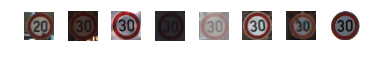

In [18]:
for i in range(8):
	plt.subplot(1, 8, i+1)
	plt.axis('off')
	plt.imshow(Xtest[i])
	plt.subplots_adjust(wspace=0.5)
plt.show()

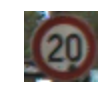

Shape:  (36, 37, 3)


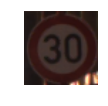

Shape:  (53, 52, 3)


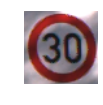

Shape:  (57, 57, 3)


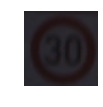

Shape:  (35, 34, 3)


In [31]:
for i in range(4):
	plt.subplot(1, 4, i+1)
	plt.axis('off')
	plt.imshow(Xtest[i])
	plt.show()
	print("Shape: ",Xtest[i].shape)

**Reading from folders  (images/train, images/test) **

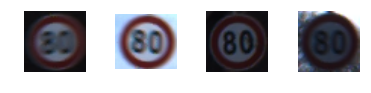

In [26]:
idclass="5"
for i in range(4):
	plt.subplot(1, 4, i+1)
	var=plt.imread("images/train/"+idclass+"/0000"+str(i)+".png")
	plt.imshow(var)
	plt.axis('off')
	plt.subplots_adjust(wspace=0.5)
plt.show()

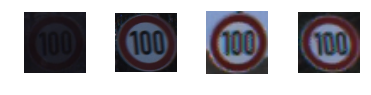

In [27]:
idclass="7"
for i in range(4):
	plt.subplot(1, 4, i+1)
	var=plt.imread("images/train/"+idclass+"/0000"+str(i)+".png")
	plt.imshow(var)
	plt.axis('off')
	plt.subplots_adjust(wspace=0.5)
plt.show()

There are 43 Classes

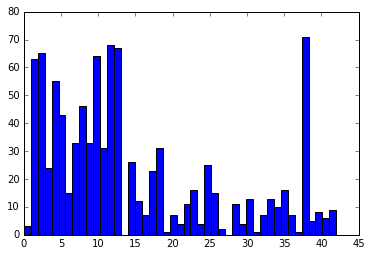

In [35]:
plt.hist(Ytrain,45)
plt.show()

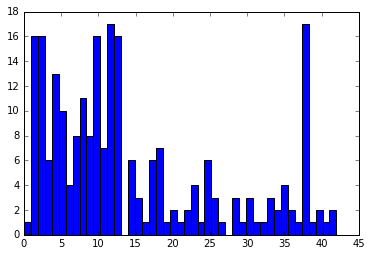

In [36]:
plt.hist(Ytest,45)
plt.show()

Descriptions for every class, have been downloaded automatically in **data/FullIJCNN2013/ReadMe.txt** , to read this descriptions, use the next function:

In [37]:
def get_label(pathreadme="data/FullIJCNN2013/ReadMe.txt"):
    label=[]
    startline=0
    with open(pathreadme, mode='rb') as f:
        for line in f:
            x=str(line.strip())
            strline = str(startline) + " ="
            if strline in x:
                label.append(x[6:(len(x)-1)].strip())
                startline = startline + 1
    f.close()
    return np.array(label)

In [39]:
label = get_label()
print(label)

['speed limit 20 (prohibitory)' 'speed limit 30 (prohibitory)'
 'speed limit 50 (prohibitory)' 'speed limit 60 (prohibitory)'
 'speed limit 70 (prohibitory)' 'speed limit 80 (prohibitory)'
 'restriction ends 80 (other)' 'speed limit 100 (prohibitory)'
 'speed limit 120 (prohibitory)' 'no overtaking (prohibitory)'
 'no overtaking (trucks) (prohibitory)'
 'priority at next intersection (danger)' 'priority road (other)'
 'give way (other)' 'stop (other)' 'no traffic both ways (prohibitory)'
 'no trucks (prohibitory)' 'no entry (other)' 'danger (danger)'
 'bend left (danger)' 'bend right (danger)' 'bend (danger)'
 'uneven road (danger)' 'slippery road (danger)' 'road narrows (danger)'
 'construction (danger)' 'traffic signal (danger)'
 'pedestrian crossing (danger)' 'school crossing (danger)'
 'cycles crossing (danger)' 'snow (danger)' 'animals (danger)'
 'restriction ends (other)' 'go right (mandatory)' 'go left (mandatory)'
 'go straight (mandatory)' 'go right or straight (mandatory)'
 '

## Next steps:  Training and Testing data
Please check reports/model1.ipynb, reports/model2.ipynb, reports/model3.ipynb